In [16]:
%load_ext autoreload
%autoreload 2
from utils import *
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
fr_stopwords = nltk.corpus.stopwords.words('french')
#fr_stopwords.extend(['de', 'ou', 'sur', 'or', 'ni', 'car', 'quand', 'a', 'mais', 'donc', 'si', 'quel', 'entre',\
#                       'tout', 'ce', 'cet', 'ça', 'tous', "c'est", 'faire', 'dans', 'fait'])

In [3]:
interval = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3]

## Decathlon

In [653]:
data = pd.read_csv('csv/decathlon_reviews.csv')

In [654]:
np.count_nonzero(data.label == 1) / len(data)

0.8713345969450329

In [655]:
np.count_nonzero(data.label == -1) / len(data)

0.1286654030549671

In [656]:
len(data)

53814

In [658]:
review_list=np.array(list(data.review))
target = np.array(data.label)

### 1) version 1 : (PP: remove numbers + remove accent + 10000 features)

In [659]:
fname="decathlon/v1"

In [660]:
#[vectorizer, X] = build_vectorizer(review_list, stopwords=None, \
#                                         b_rmaccent=True, b_rmnumbers=True, max_features=10000)

#save_vectorizer(vectorizer,fname)

Removing numbers
Removing accents
Keeping the top 10000 occurring tokens


In [661]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(review_list.astype('U'))

In [662]:
features = vectorizer.get_feature_names()
print(len(features))

10000


In [19]:
#vectorizer.get_feature_names()

In [663]:
X.shape

(53814, 10000)

In [664]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3,random_state=0,stratify=target)

In [665]:
mean_scores = []
for C in interval:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4,scoring='f1')
    mean_scores.append(np.mean(scores)) 

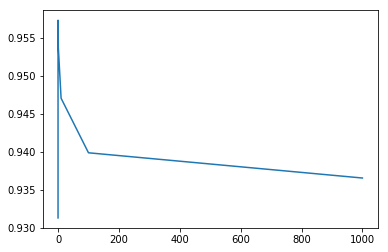

In [666]:
plt.plot(interval, mean_scores)
plt.show()

In [667]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
f1_score(y_test,y_pred,pos_label=-1)

0.6735664335664335

### 2) version 2 : (PP: remove numbers + remove accent +remove stopwords+ steemming+10000 features)

In [668]:
fname="decathlon/v2"

In [669]:
#[vectorizer, X] = build_vectorizer(review_list, stopwords=fr_stopwords, b_stemming=True,\
#                                          b_rmaccent=True, b_rmnumbers=True, max_features=10000)

#save_vectorizer(vectorizer,fname)

Removing numbers
Removing stopwords
Stemming
Removing accents
Keeping the top 10000 occurring tokens


In [670]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(review_list.astype('U'))

In [671]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3,random_state=0,stratify=target)

In [672]:
mean_scores = []
for C in interval:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4,scoring='f1')
    mean_scores.append(np.mean(scores)) 

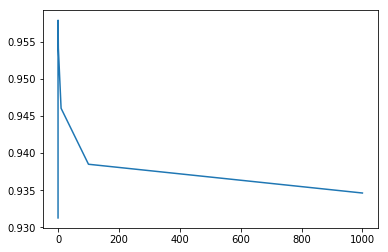

In [673]:
plt.plot(interval, mean_scores)
plt.show()

In [674]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
f1_score(y_test,y_pred,pos_label=-1)

0.6709569110240627

In [678]:
words_freq=get_words_freq(vectorizer, X)


In [679]:
max(map(lambda x: x[1],words_freq))

14694

In [680]:
min(map(lambda x: x[1],words_freq))

2

### 3) version 3 : (PP: remove numbers + remove accent +steemming+min_f=0.0002 +max_f=0.02)

In [681]:
fname="decathlon/v3"

In [682]:
#[vectorizer, X] = build_vectorizer(review_list,b_rmaccent=True, b_rmnumbers=True,min_df=0.0002,max_df=0.02)

#save_vectorizer(vectorizer,fname)

Ignoring terms in the vocabulary that have a document frequency < 0.0002
Ignoring terms in the vocabulary that have a document frequency > 0.02
Removing numbers
Removing accents


In [683]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(review_list.astype('U'))

In [684]:
features = vectorizer.get_feature_names()
print(len(features))

5544


In [685]:
words_freq=get_words_freq(vectorizer, X)

In [686]:
min(map(lambda x: x[1],words_freq))

11

In [687]:
max(map(lambda x: x[1],words_freq))

1281

In [688]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3,random_state=0,stratify=target)

In [689]:
mean_scores = []
for C in interval:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4,scoring='f1')
    mean_scores.append(np.mean(scores)) 

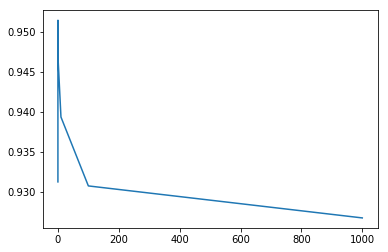

In [690]:
plt.plot(interval, mean_scores)
plt.show()

In [691]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
f1_score(y_test,y_pred,pos_label=-1)

0.6221574344023323

## Movies

In [692]:
data_movies = pd.read_csv('csv/movie_reviews.csv')
review_list_movies=np.array(list(data_movies.review))
target_movies = np.array(data_movies.label)

In [693]:
print(np.count_nonzero(data_movies.label == -1) / len(data_movies))
print(np.count_nonzero(data_movies.label == 1) / len(data_movies))

0.8365562575786585
0.1634437424213415


In [694]:
len(data)

53814

### 1) version 1 : (PP: remove numbers + remove accent + 10000 features)

In [700]:
fname="movies/v1"

In [696]:
#[vectorizer, X] = build_vectorizer(review_list_movies,stopwords=None, \
#                                         b_rmaccent=True, b_rmnumbers=True, max_features=10000)
#save_vectorizer(vectorizer,fname)

Removing numbers
Removing accents
Keeping the top 10000 occurring tokens


In [697]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(review_list_movies.astype('U'))

In [698]:
features = vectorizer.get_feature_names()
print(len(features))

10000


In [701]:
X_train, X_test, y_train, y_test = train_test_split(X, target_movies, test_size=0.3,random_state=0,stratify=target_movies)

In [702]:
#vectorizer.get_feature_names()
print(np.count_nonzero(y_test == -1) / len(y_test))

0.8366305041480536


In [703]:
mean_scores = []
for C in interval[1:]:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4,scoring='f1')
    mean_scores.append(np.mean(scores))

In [704]:
mean_scores[0]

0.2776777775241919

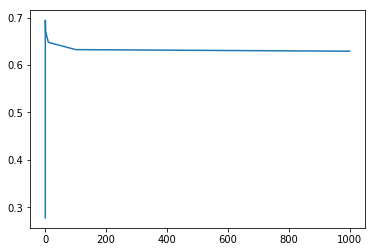

In [705]:
plt.plot(interval[1:], mean_scores)
plt.show()

In [706]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
f1_score(y_test,y_pred,pos_label=-1)

0.9456774984671981

### 2) version 2 : (PP: remove numbers + remove accent +remove stopwords+ steemming+10000 features)

In [707]:
fname="movies/v2"

In [708]:
#[vectorizer, X] = build_vectorizer(review_list_movies, stopwords=fr_stopwords, b_stemming=True,\
#                                          b_rmaccent=True, b_rmnumbers=True, max_features=10000)

#save_vectorizer(vectorizer,fname)

Removing numbers
Removing stopwords
Stemming
Removing accents
Keeping the top 10000 occurring tokens


In [709]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(review_list_movies.astype('U'))


In [712]:
X_train, X_test, y_train, y_test = train_test_split(X, target_movies, test_size=0.3,random_state=0,stratify=target_movies)

In [713]:
mean_scores = []
for C in interval[1:]:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4,scoring='f1')
    mean_scores.append(np.mean(scores)) 

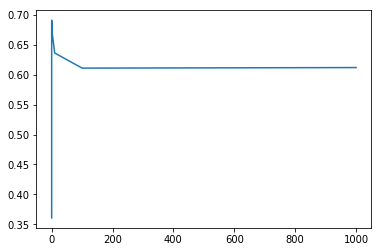

In [714]:
plt.plot(interval[1:], mean_scores)
plt.show()

In [715]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
f1_score(y_test,y_pred,pos_label=-1)

0.9468622857847367

In [716]:
words_freq=get_words_freq(vectorizer, X)

In [717]:
max(map(lambda x: x[1],words_freq))

22221

In [718]:
min(map(lambda x: x[1],words_freq))

2

### 3) version 3 : (PP: remove numbers + remove accent +steemming+min_f=0.0002 +max_f=0.02)

In [719]:
fname="movies/v3"

In [720]:
#[vectorizer, X] = build_vectorizer(review_list_movies,b_rmaccent=True, b_rmnumbers=True,min_df=0.001,max_df=0.3)

#save_vectorizer(vectorizer,fname)

Ignoring terms in the vocabulary that have a document frequency < 0.001
Ignoring terms in the vocabulary that have a document frequency > 0.3
Removing numbers
Removing accents


In [721]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(review_list_movies.astype('U'))

In [722]:
X_train, X_test, y_train, y_test = train_test_split(X, target_movies, test_size=0.3,random_state=0,stratify=target_movies)

In [723]:
features = vectorizer.get_feature_names()
print(len(features))

4136


In [724]:
words_freq=get_words_freq(vectorizer, X)

In [725]:
min(map(lambda x: x[1],words_freq))

16

In [726]:
max(map(lambda x: x[1],words_freq))

6340

In [727]:
mean_scores = []
for C in interval[1:]:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4,scoring='f1')
    mean_scores.append(np.mean(scores)) 

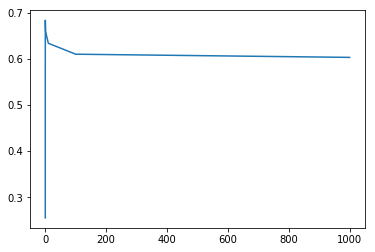

In [728]:
plt.plot(interval[1:], mean_scores)
plt.show()

In [729]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
f1_score(y_test,y_pred,pos_label=-1)

0.9443354585581167

## Tweets Traduis

In [4]:

data_git = pd.read_csv("csv/tweets_git.csv")
tweet_list_start=np.array(data_git.review)[:10000].astype('U')
tweet_list_end=np.array(data_git.review)[-10000:].astype('U')
label_list_start=np.array(data_git.label)[:10000]
label_list_end=np.array(data_git.label)[-10000:]

In [5]:
print(np.count_nonzero(data_git.label == -1) / len(data_git))
print(np.count_nonzero(data_git.label == 1) / len(data_git))

0.5034518552265773
0.4965481447734227


In [7]:
target_tweets = np.append(label_list_start,label_list_end)



In [8]:
tweet_list = np.append(tweet_list_start,tweet_list_end)

In [9]:
len(tweet_list)


20000

In [10]:
len(target_tweets)

20000

In [543]:
print(np.count_nonzero(target_tweets == -1) / len(target_tweets))
print(np.count_nonzero(target_tweets == 1) / len(target_tweets))

0.4999
0.5001


### 1) version 1 : (PP: remove numbers + remove accent + 10000 features)

In [544]:
fname="twitter/v1"

In [545]:
[vectorizer, X] = build_vectorizer(tweet_list, stopwords=None, \
                                         b_rmaccent=True, b_rmnumbers=True, max_features=10000)

save_vectorizer(vectorizer,fname)

Removing numbers
Removing accents
Keeping the top 10000 occurring tokens


In [ ]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(tweet_list.astype('U'))

In [546]:
X_train, X_test, y_train, y_test = train_test_split(X, target_tweets, test_size=0.3,random_state=0,stratify=target_tweets)

In [547]:
mean_scores = []
for C in interval:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4)
    mean_scores.append(np.mean(scores)) 

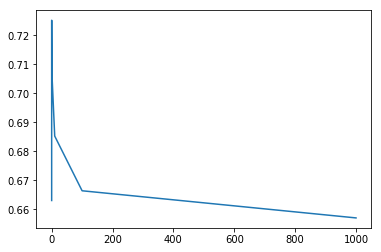

In [549]:
plt.plot(interval, mean_scores)
plt.show()

In [550]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7315

### 2) version 2 : (PP: remove numbers + remove accent +remove stopwords+ steemming+10000 features)


In [551]:
fname="twitter/v2"

In [552]:
[vectorizer, X] = build_vectorizer(tweet_list, stopwords=fr_stopwords, b_stemming=True,\
                                          b_rmaccent=True, b_rmnumbers=True, max_features=10000)

save_vectorizer(vectorizer,fname)

Removing numbers
Removing stopwords
Stemming
Removing accents
Keeping the top 10000 occurring tokens


In [553]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(tweet_list.astype('U'))

In [554]:
X_train, X_test, y_train, y_test = train_test_split(X, target_tweets, test_size=0.3,random_state=0,stratify=target_tweets)

In [555]:
mean_scores = []
for C in interval:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4)
    mean_scores.append(np.mean(scores)) 

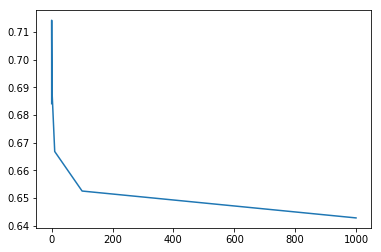

In [556]:
plt.plot(interval, mean_scores)
plt.show()

In [557]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)


0.7241666666666666

In [565]:
words_freq=get_words_freq(vectorizer, X)


In [568]:
max(map(lambda x: x[1],words_freq))

1305

In [567]:
min(map(lambda x: x[1],words_freq))

1

### 3) version 3 : (PP: remove numbers + remove accent +steemming+min_f=0.0002 +max_f=0.02)

In [18]:
fname="twitter/v3"

In [71]:
[vectorizer, X] = build_vectorizer(tweet_list,b_rmaccent=True, b_rmnumbers=True,min_df=0.0002,max_df=0.02)

save_vectorizer(vectorizer,fname)

Ignoring terms in the vocabulary that have a document frequency < 0.0002
Ignoring terms in the vocabulary that have a document frequency > 0.02
Removing numbers
Removing accents


In [49]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(tweet_list.astype('U'))

TypeError: load_vectorizer() missing 1 required positional argument: 'fname'

In [72]:
features = vectorizer.get_feature_names()
print(len(features))

4876


In [73]:
words_freq=get_words_freq(vectorizer, X)

In [64]:
4515 / np.array(words_freq)[:,1].astype(int).sum()

0.025302339135405343

In [74]:
min(map(lambda x: x[1],words_freq))

4

In [75]:
max(map(lambda x: x[1],words_freq))

415

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, target_tweets, test_size=0.3,random_state=0,stratify=target_tweets)

In [77]:
mean_scores = []
for C in interval:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4)
    mean_scores.append(np.mean(scores)) 

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


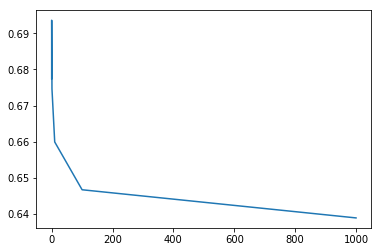

In [78]:
plt.plot(interval, mean_scores)
plt.show()

In [79]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
clf.score(X_test,y_test)

0.7068333333333333